(3, 224, 224)
tensor([0, 0], device='cuda:0')


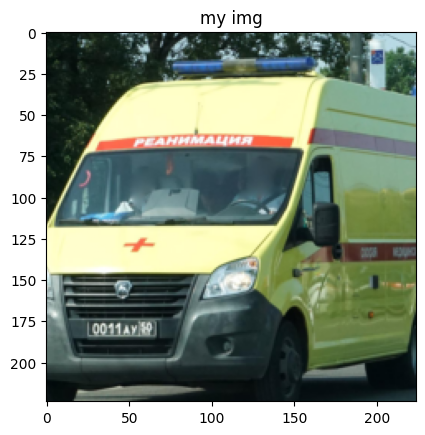

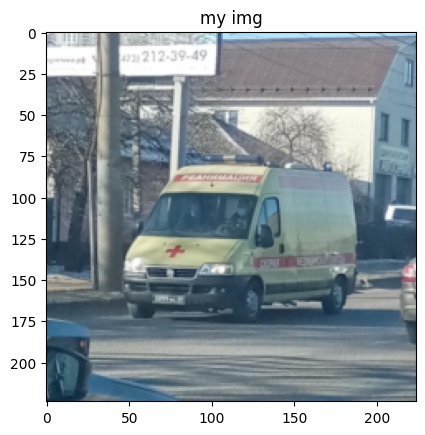

In [2]:
from train import *
from matplotlib import pyplot as plt

dataset_train = create_dataset(
    "temp",
    root="../spec_classification",
    split="train",
    is_training=True,
    class_map=None,
    download=False,
    batch_size=None,
    seed=42,
    repeats=0,
)

loader_train = create_loader(
    dataset_train,
    input_size=(3,224,224),
    batch_size=2,
    mean=(0,0,0),
    std=(1,1,1),
)


for batch_idx, (input, target) in enumerate(loader_train):

    print(input[0].cpu().numpy().shape)
    print(target)
    for i in input:
        plt.imshow(i.cpu().numpy().transpose(1,2,0))
        plt.title('my img')
        plt.show() 
    break

In [8]:
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor
import timm

model = timm.create_model('mixnet_s', exportable=True, num_classes=4)
nodes, _ = get_graph_node_names(model)
nodes

['x',
 'conv_stem',
 'bn1.getattr',
 'bn1.eq',
 'bn1.getattr_1',
 'bn1._assert',
 'bn1.bn1_weight',
 'bn1.bn1_bias',
 'bn1.batch_norm',
 'bn1.drop',
 'bn1.act',
 'blocks.0.0.conv_dw',
 'blocks.0.0.bn1.getattr',
 'blocks.0.0.bn1.eq',
 'blocks.0.0.bn1.getattr_1',
 'blocks.0.0.bn1._assert',
 'blocks.0.0.bn1.blocks_0_0_bn1_weight',
 'blocks.0.0.bn1.blocks_0_0_bn1_bias',
 'blocks.0.0.bn1.batch_norm',
 'blocks.0.0.bn1.drop',
 'blocks.0.0.bn1.act',
 'blocks.0.0.se',
 'blocks.0.0.conv_pw',
 'blocks.0.0.bn2.getattr',
 'blocks.0.0.bn2.eq',
 'blocks.0.0.bn2.getattr_1',
 'blocks.0.0.bn2._assert',
 'blocks.0.0.bn2.blocks_0_0_bn2_weight',
 'blocks.0.0.bn2.blocks_0_0_bn2_bias',
 'blocks.0.0.bn2.batch_norm',
 'blocks.0.0.bn2.drop',
 'blocks.0.0.bn2.act',
 'blocks.0.0.drop_path',
 'blocks.0.0.add',
 'blocks.1.0.conv_pw.split',
 'blocks.1.0.conv_pw.getitem',
 'blocks.1.0.conv_pw.0',
 'blocks.1.0.conv_pw.getitem_1',
 'blocks.1.0.conv_pw.1',
 'blocks.1.0.conv_pw.cat',
 'blocks.1.0.bn1.getattr',
 'blocks.1

In [9]:
features = {'classifier': 'out'}
feature_extractor = create_feature_extractor(model, return_nodes=features)

feature_extractor

EfficientNet(
  (conv_stem): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): Module(
    (drop): Identity()
    (act): ReLU(inplace=True)
  )
  (blocks): Module(
    (0): Module(
      (0): Module(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (bn1): Module(
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (se): Identity()
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): Module(
          (drop): Identity()
          (act): Identity()
        )
        (drop_path): Identity()
      )
    )
    (1): Module(
      (0): Module(
        (conv_pw): Module(
          (0): Conv2d(8, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): Conv2d(8, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (bn1): Module(
          (drop): Identity()
          (act): ReLU(inplace=True)
   

(3, 224, 224)
tensor([0, 1, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 2, 0, 3, 3, 3, 2, 0, 2, 1, 3, 3, 3,
        2, 1, 1, 3, 0, 2, 1, 0], device='cuda:0')


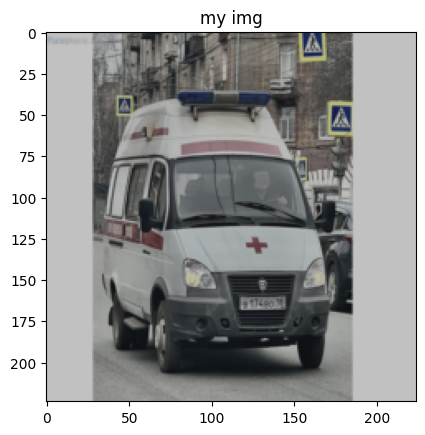

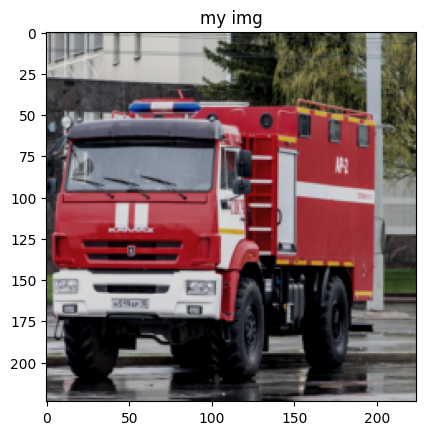

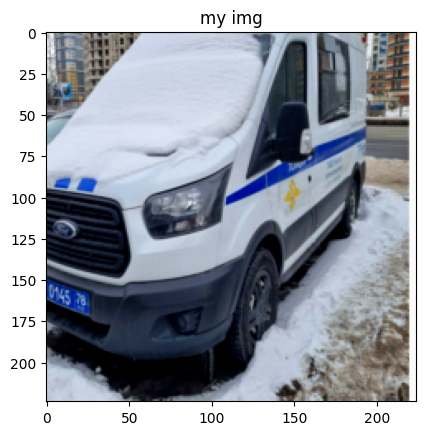

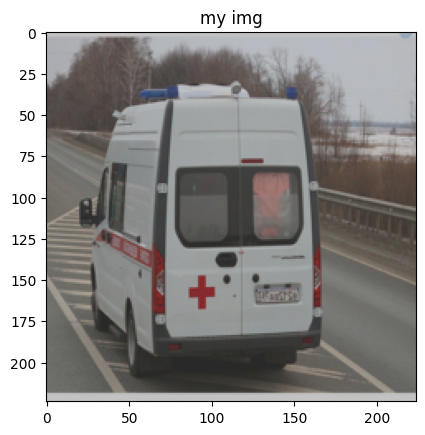

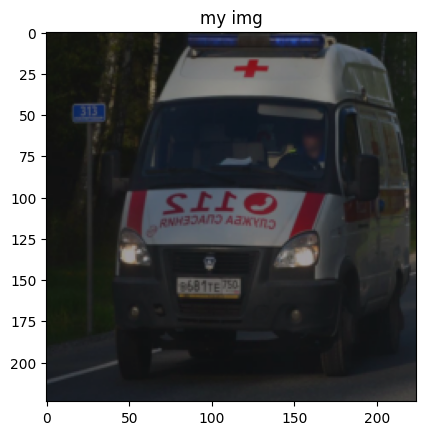

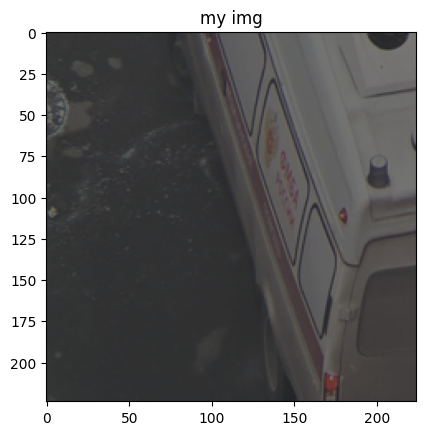

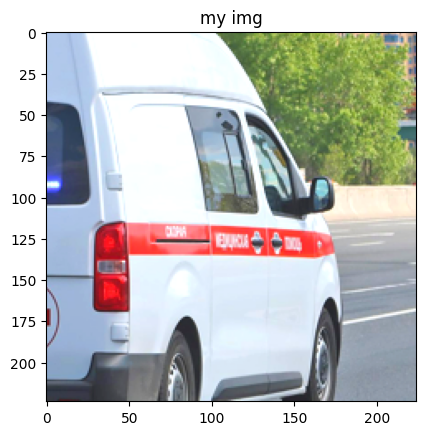

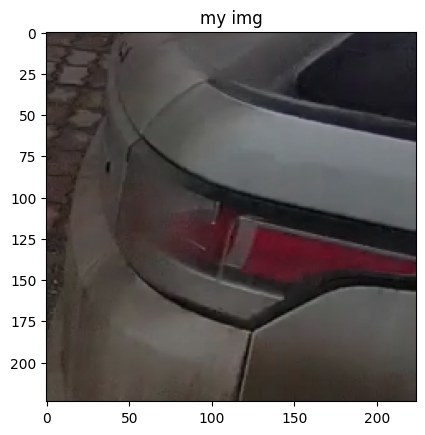

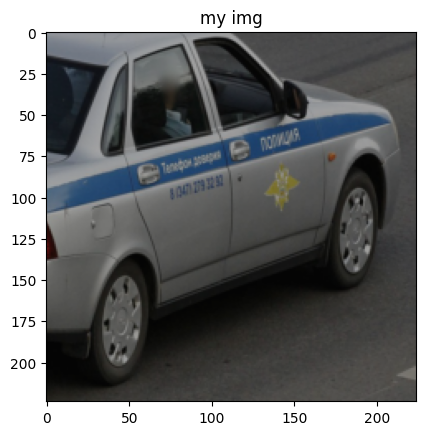

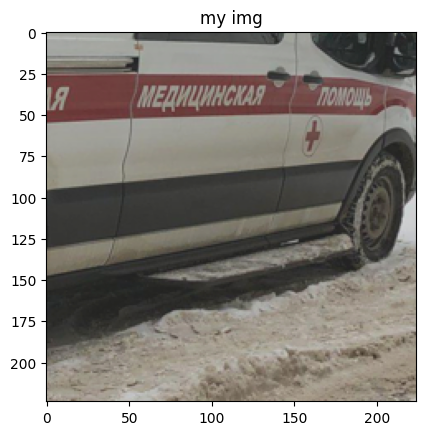

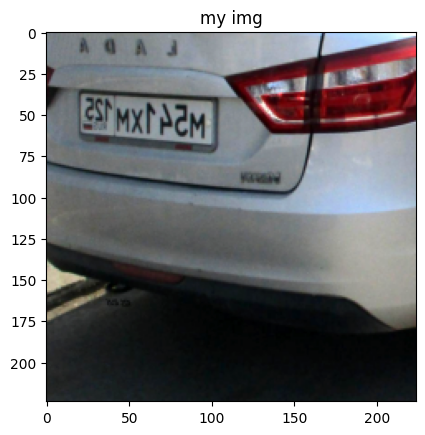

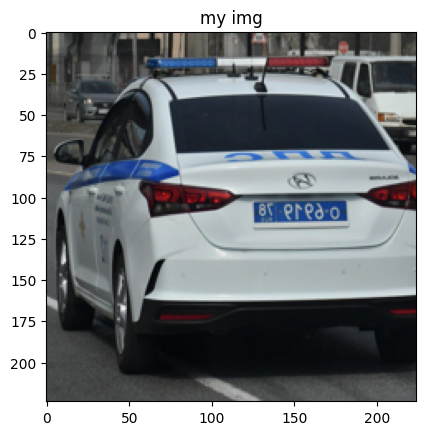

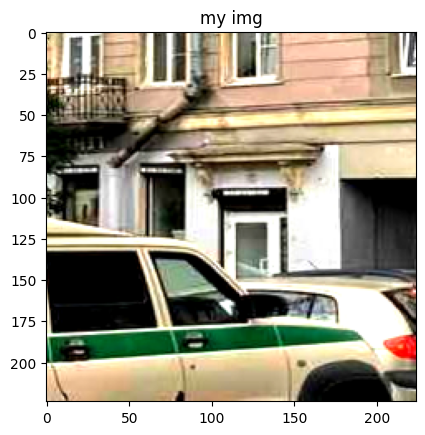

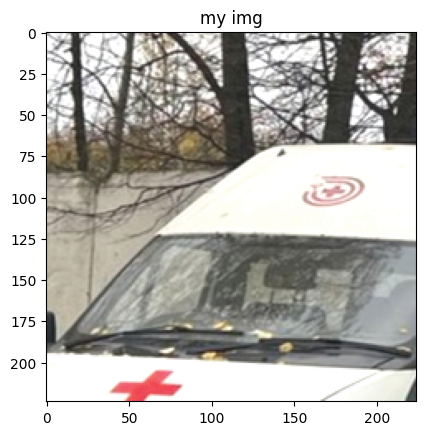

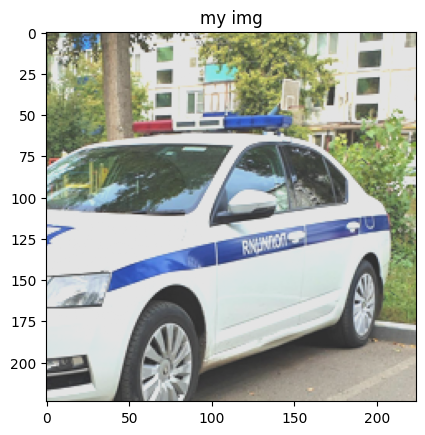

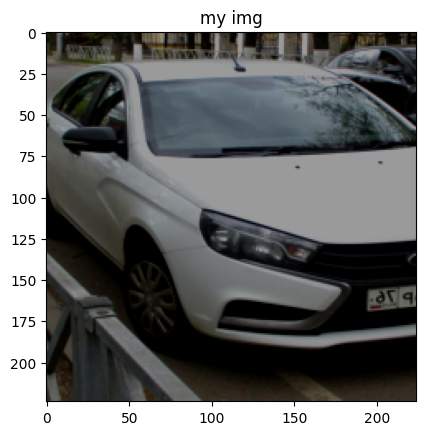

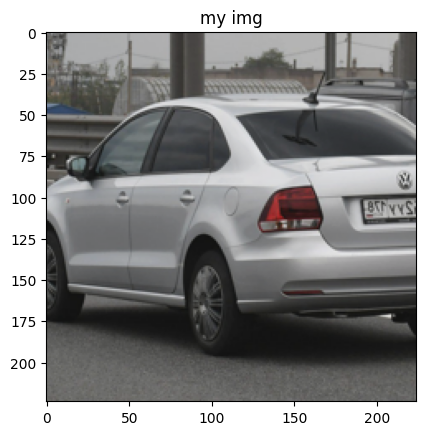

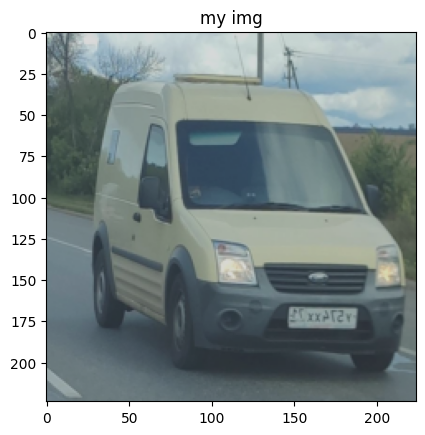

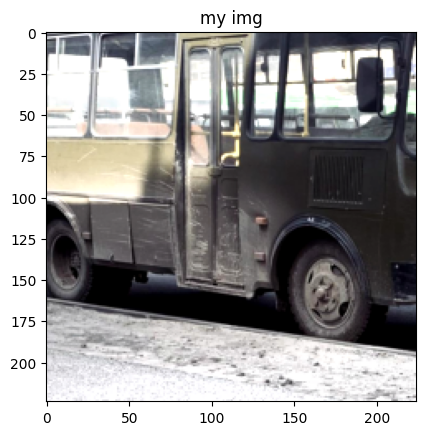

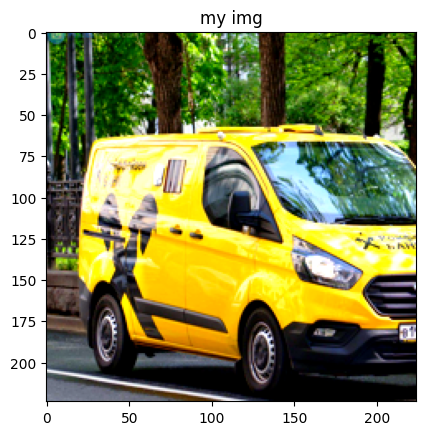

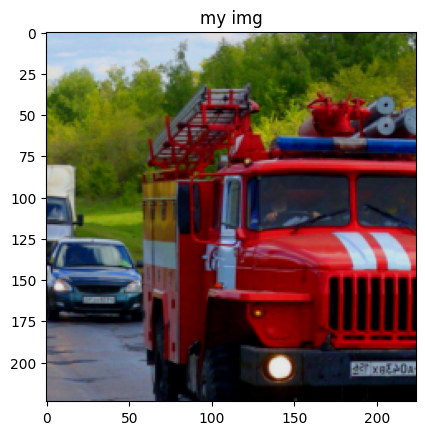

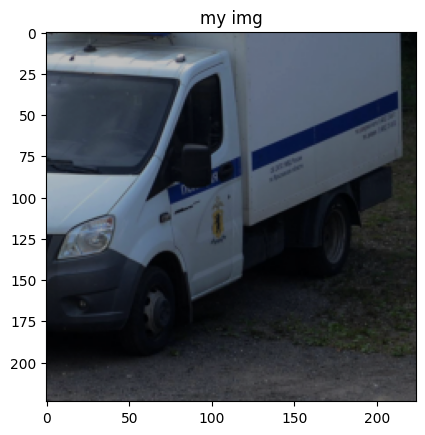

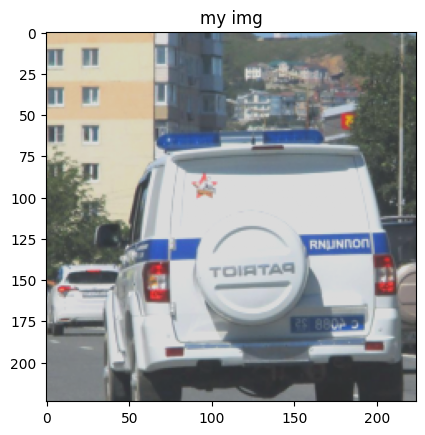

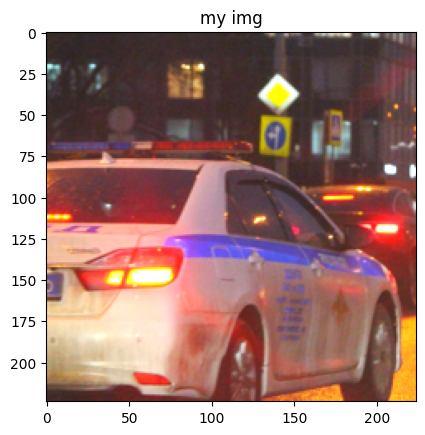

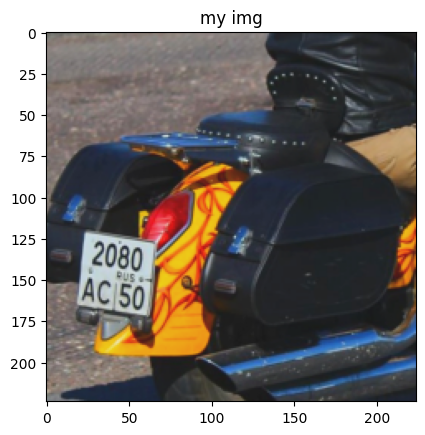

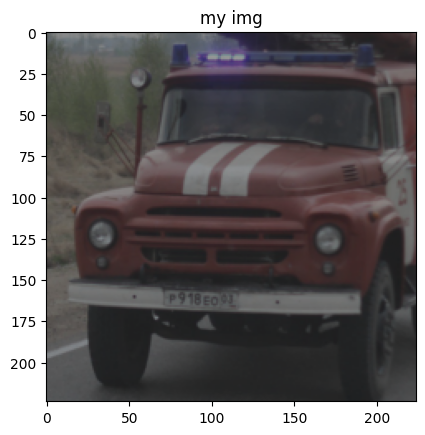

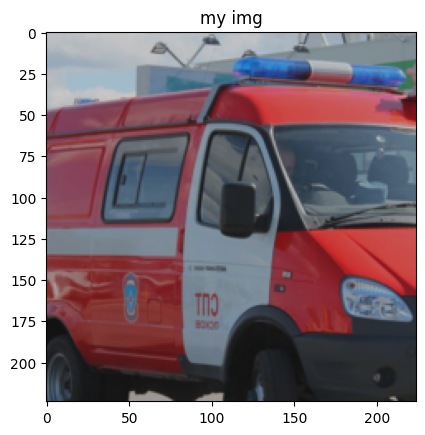

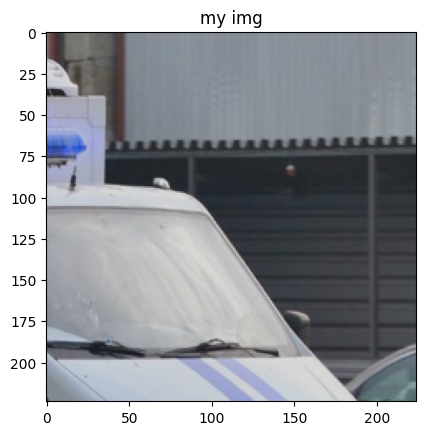

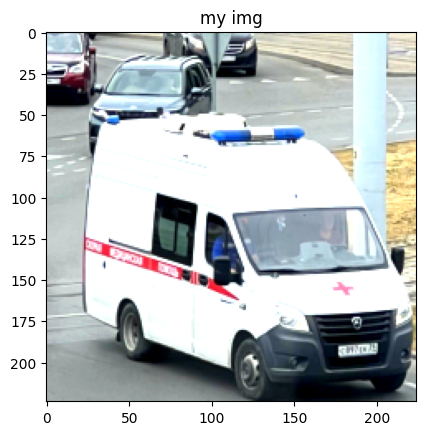

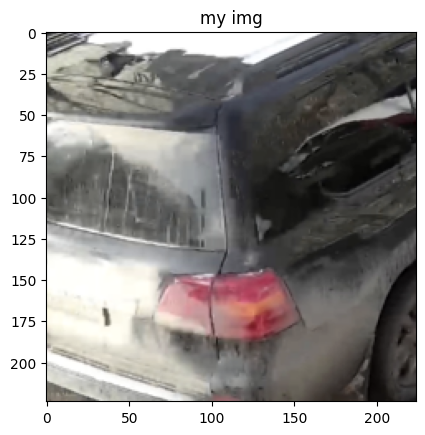

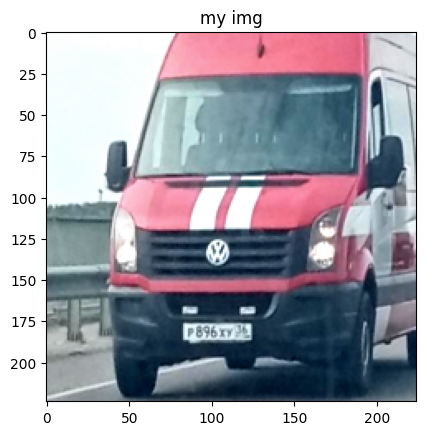

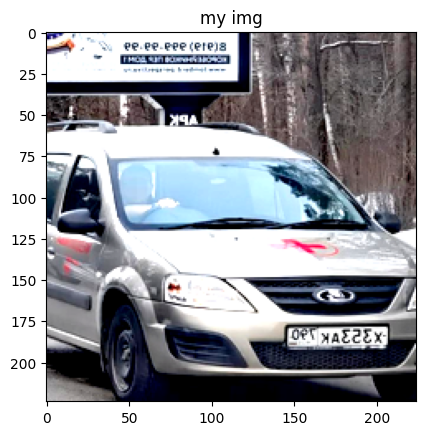

In [13]:
dataset_train = create_dataset(
    "temp",
    root="../spec_classification",
    split="train",
    is_training=True,
    class_map=None,
    download=False,
    batch_size=None,
    seed=42,
    repeats=0,
)

loader_train = create_loader(
    dataset_train,
    input_size=(3,224,224),
    batch_size=32,
    is_training=True,
    use_prefetcher=True,
    no_aug=False,
#     re_prob=0.3,
    re_mode='pixel',
    re_count=1,
    re_split=False,
#     scale=[0.08, 1.0],
#     ratio=[0.75, 1.3333333333333333],
    hflip=0.5,
    vflip=0.0,
    color_jitter=0.4,
#     auto_augment='rand-m9-mstd0.5',
    num_aug_repeats=0,
    num_aug_splits=0,
    interpolation='random',
    mean=(0,0,0),#data_config['mean'],
    std=(1,1,1),#data_config['std'],
    num_workers=32,
    distributed=False,
    collate_fn=None,
)

for batch_idx, (input, target) in enumerate(loader_train):

    print(input[0].cpu().numpy().shape)
    print(target)
    for i in input:
        plt.imshow(i.cpu().numpy().transpose(1,2,0))
        plt.title('my img')
        plt.show() 
    break